<a href="https://colab.research.google.com/github/anujb6/trend-prediction-LSTM-Prophet-yFinance/blob/main/share_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
import yfinance as yf
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import datetime
from datetime import date
from prophet import Prophet 
from plotly import graph_objs as go
from prophet.plot import plot_plotly
import streamlit as st

In [260]:
stock = yf.Ticker("AAPL")
stock_data = stock.history(start=datetime.datetime(2010, 1, 1), end=datetime.datetime.today())
data1 = stock_data
stock_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.487649,6.520174,6.455732,6.505279,493729600,0.0,0.0
2010-01-05 00:00:00-05:00,6.523216,6.553309,6.482179,6.516528,601904800,0.0,0.0
2010-01-06 00:00:00-05:00,6.516528,6.542365,6.406186,6.412874,552160000,0.0,0.0
2010-01-07 00:00:00-05:00,6.436585,6.444184,6.354512,6.401020,477131200,0.0,0.0
2010-01-08 00:00:00-05:00,6.392507,6.444182,6.354815,6.443574,447610800,0.0,0.0


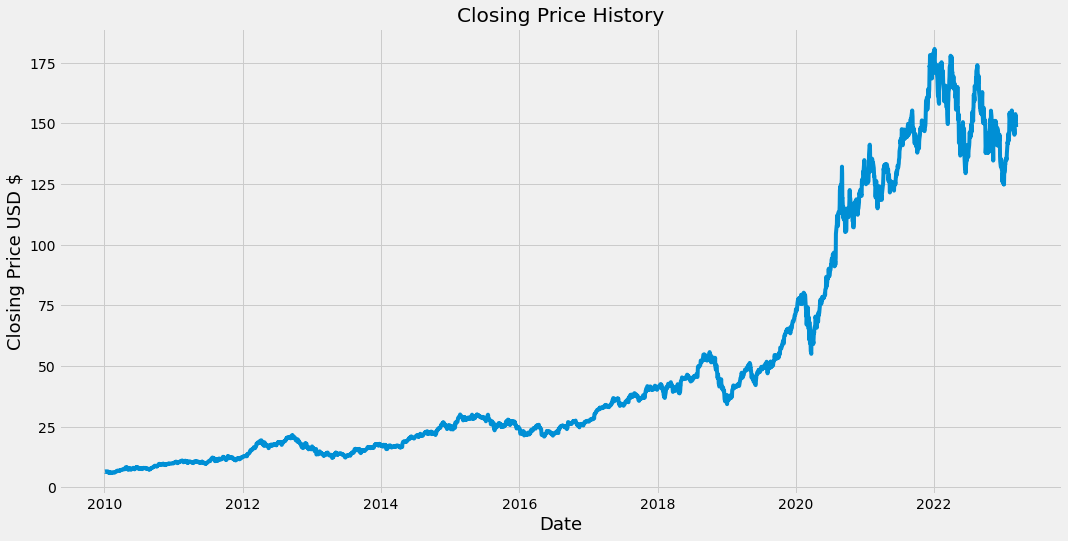

In [240]:
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(stock_data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price USD $", fontsize=18)
plt.show()

In [241]:
data = stock_data.filter(["Close"])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8) #This is use to train 80% of the dataset

training_data_len

2656

In [242]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00381774],
       [0.00388206],
       [0.00328924],
       ...,
       [0.84092376],
       [0.82788373],
       [0.81593038]])

In [243]:
train_data = scaled_data[0:training_data_len , :]
#Spliting the data into x_train & y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)

x_train = np.array(x_train)
y_train = np.array(y_train)       

[array([3.81773882e-03, 3.88206487e-03, 3.28923544e-03, 3.22144314e-03,
       3.46483053e-03, 3.13972858e-03, 2.72422327e-03, 3.23361183e-03,
       3.02150796e-03, 2.41302996e-03, 3.99681379e-03, 3.42135651e-03,
       2.78506398e-03, 9.90938040e-04, 1.91582645e-03, 2.41476717e-03,
       2.75204599e-03, 1.25866280e-03, 1.73176074e-06, 4.65906364e-04,
       6.62353484e-04, 1.24823132e-03, 0.00000000e+00, 5.92821245e-04,
       3.59865336e-04, 7.19733399e-04, 5.33706842e-04, 1.15087364e-03,
       1.44816651e-03, 1.97318455e-03, 1.82542309e-03, 1.89148090e-03,
       1.67242543e-03, 1.45511264e-03, 8.70985655e-04, 1.49683580e-03,
       1.72980262e-03, 2.18528842e-03, 2.94501322e-03, 2.92067858e-03,
       3.00412490e-03, 3.24403785e-03, 4.67657215e-03, 4.69917776e-03,
       5.38414777e-03, 5.70053637e-03, 5.81528529e-03, 6.00652349e-03,
       5.52669486e-03, 5.63274680e-03, 5.57536961e-03, 5.66751564e-03,
       5.25027312e-03, 5.68490961e-03, 6.31249971e-03, 6.48808115e-03,
     

In [244]:

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2596, 60, 1)

In [245]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))#50 means the no of input neurons
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))#

In [246]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [247]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2596/2596 [==============================] - 88s 32ms/step - loss: 2.2179e-04
Epoch 2/5
2596/2596 [==============================] - 84s 32ms/step - loss: 1.4206e-04
Epoch 3/5
2596/2596 [==============================] - 85s 33ms/step - loss: 8.8943e-05
Epoch 4/5
2596/2596 [==============================] - 86s 33ms/step - loss: 7.5519e-05
Epoch 5/5
2596/2596 [==============================] - 87s 34ms/step - loss: 5.7258e-05


In [248]:
test_data = scaled_data[training_data_len - 60: , :]

#Creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

In [249]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [250]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 1s 17ms/step


In [251]:
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

5.792564875399904

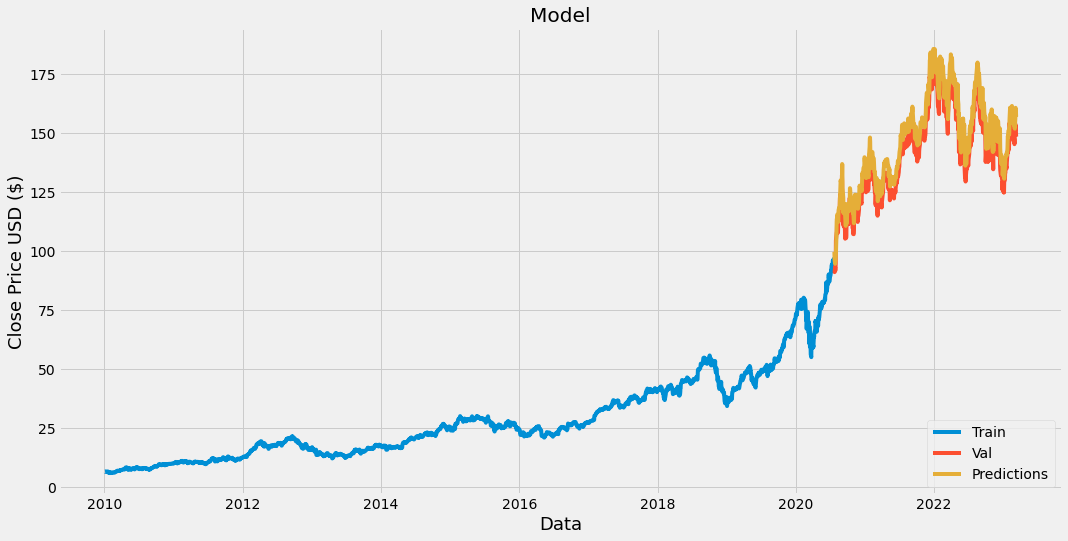

In [252]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Data", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

[*********************100%***********************]  1 of 1 completed

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2023-03-12 20:39:46.704 Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5elxabs3/ksmyg166.json
2023-03-12 20:39:46.736 input tempfile: /tmp/tmp5elxabs3/ksmyg166.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5elxabs3/m9pvmsrm.json
2023-03-12 20:39:46.839 input tempfile: /tmp/tmp5elxabs3/m9pvmsrm.json
DEBUG:cmdstanpy:idx 0
2023-03-12 20:39:46.845 idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
2023-03-12 20:39:46.850 running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49745', 'data', 'file=/tmp/tmp5elxabs3/ksmyg166.json', 'init=/tmp/tmp5elxabs3/m9pvmsrm.json', 'output', 'file=/tmp/tmp5elxabs3/prophet_modelsdgvne4e/prophet_model-20230312203946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000

20:39:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
2023-03-12 20:39:47.619 Chain [1] done processing


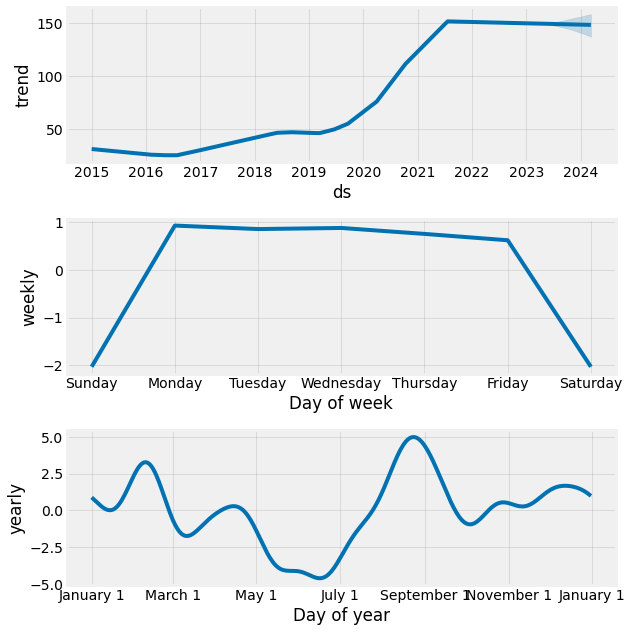

In [269]:
n_years = st.slider('Years of prediction:', 1, 4)
period = n_years * 365

START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
 
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

data = load_data('AAPL')

df_train = data[['Date','Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

st.subheader('Forecast data')
st.write(forecast.tail())

st.write(f'Forecast plot for {n_years} years')
fig1 = plot_plotly(m, forecast)
st.plotly_chart(fig1)

st.write("Forecast components")
fig2 = m.plot_components(forecast)
st.write(fig2)